In [1]:
import fasttext

model = fasttext.train_unsupervised('data/isc_sentences.txt', model='cbow', dim=32, ws=7, lr=0.1, epoch=50, minCount=1)

model.save_model('models/fasttext_32model.bin')
model.save_model('models/fasttext_32model.vec')

Read 0M words
Number of words:  4185
Number of labels: 0
Progress: 100.0% words/sec/thread:  297730 lr:  0.000000 avg.loss:  1.634845 ETA:   0h 0m 0s


In [7]:
import fasttext

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
def get_random_word_vectors(model, num_samples=20):
    """Get random word vectors from the FastText model."""
    # Get the list of words in the vocabulary
    words = model.get_words()
    
    # Randomly sample words
    sampled_words = random.sample(words, num_samples)
    
    # Retrieve corresponding vectors
    vectors = np.array([model.get_word_vector(word) for word in sampled_words])
    
    return sampled_words, vectors

In [3]:
def get_word_vectors(model, words):
    vectors = np.array([model.get_word_vector(word) for word in words])

    return vectors

In [22]:
def visualize_embeddings_2D(words, vectors, dimension='tsne'):
    """Visualize word vectors in 2D using t-SNE or PCA."""
    # Reduce dimensionality using t-SNE
    if dimension == 'tsne':
        perplexity = min(30, len(words) - 1)  # Ensure perplexity is less than the number of samples
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
        reduced_vectors = tsne.fit_transform(vectors)
    # Reduce dimensionality using PCA
    # elif dimension == 'pca':
    #     pca = PCA(n_components=2)
    #     reduced_vectors = pca.fit_transform(vectors)
    else:
        raise ValueError("Invalid dimension specified. Use 'tsne' or 'pca'.")

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

    # Annotate each point with the corresponding word
    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)

    plt.title(f'Visualización 2D de los vectores - FastText 64 ({dimension.upper()})')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid()
    plt.show()

In [8]:
model = fasttext.load_model("models/fasttext_32model.bin")

In [11]:
words, vectors = get_random_word_vectors(model,num_samples=20)

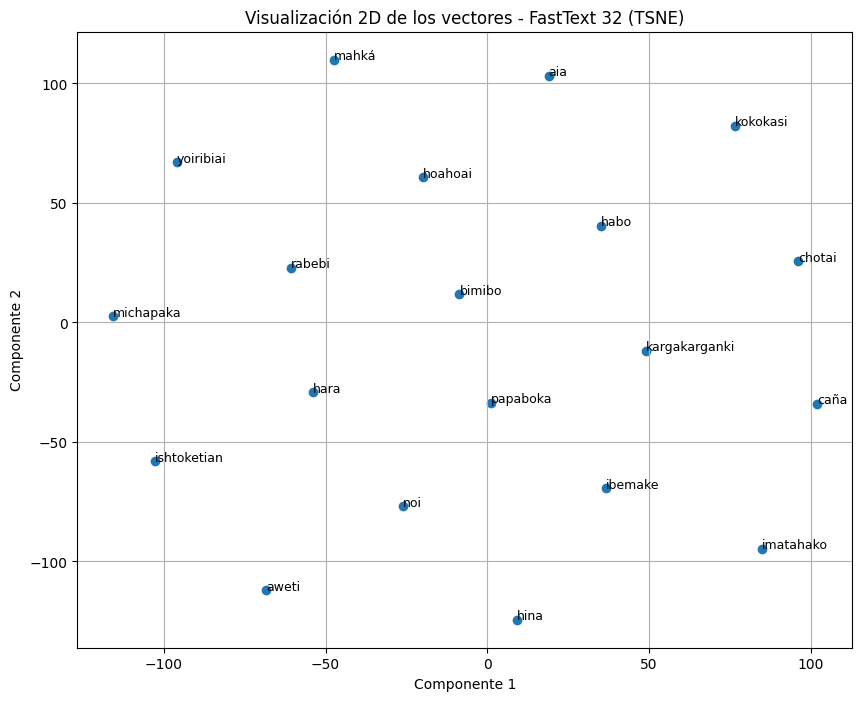

In [21]:
visualize_embeddings_2D(words,vectors)

In [17]:
model64 = fasttext.load_model("models/fasttext_64model.bin")

In [18]:
vectors64 = get_word_vectors(model64, words)

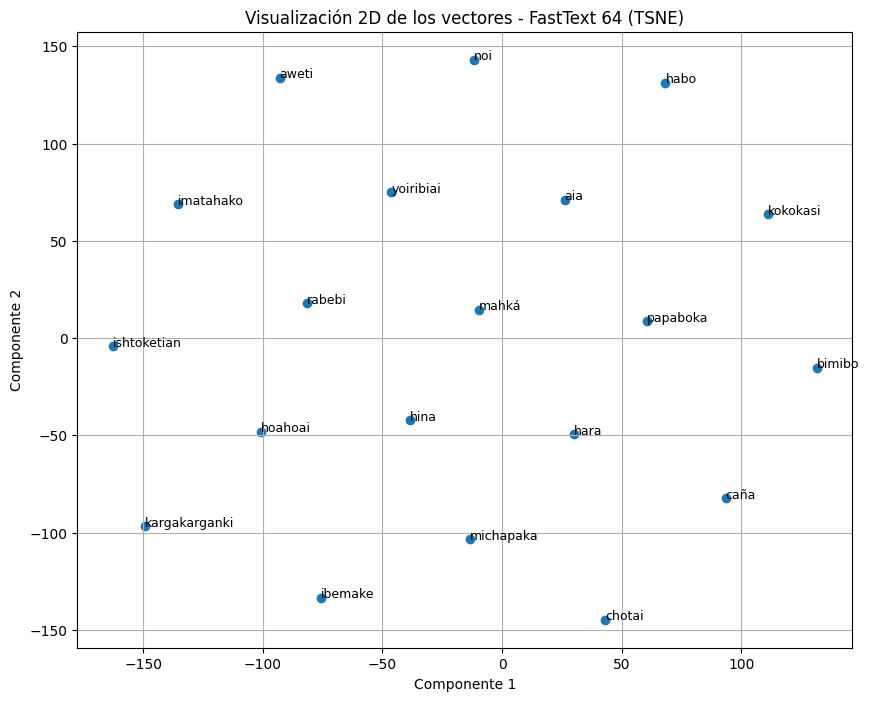

In [23]:
visualize_embeddings_2D(words,vectors64)

- fasttext.train_unsupervised('data/isc_sentences.txt', model='cbow', dim=100, ws=7, lr=0.1, epoch=50, minCount=1)
   - Progress: 100.0% words/sec/thread:  149359 lr:  0.000000 avg.loss:  1.709613 ETA:   0h 0m 0s
- fasttext.train_unsupervised('data/isc_sentences.txt', model='cbow', dim=32, ws=7, lr=0.1, epoch=50, minCount=1)
   - Progress: 100.0% words/sec/thread:  296381 lr:  0.000000 avg.loss:  1.644967 ETA:   0h 0m 0s
- fasttext.train_unsupervised('data/isc_sentences.txt', model='cbow', dim=64, ws=7, lr=0.1, epoch=50, minCount=1)
   - Progress: 100.0% words/sec/thread:  149516 lr:  0.000000 avg.loss:  1.670575 ETA:   0h 0m 0s
- fasttext.train_unsupervised('data/isc_sentences.txt', model='cbow', dim=16, ws=7, lr=0.1, epoch=50, minCount=1)
   - Progress: 100.0% words/sec/thread:  295987 lr:  0.000000 avg.loss:  1.800488 ETA:   0h 0m 0s
- fasttext.train_unsupervised('data/isc_sentences.txt', model='cbow', dim=16, ws=7, lr=0.05, epoch=50, minCount=1)
   - Progress: 100.0% words/sec/thread:  294007 lr:  0.000000 avg.loss:  2.609519 ETA:   0h 0m 0s